# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
%matplotlib inline


# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

# Save the DataFrame to a CSV file in your project directory
df.to_csv('../data/raw/bank-marketing-campaign-data.csv', index=False)

print("CSV file has been downloaded and saved as a DataFrame.")

CSV file has been downloaded and saved as a DataFrame.


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print(df.shape)
print(df.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
#All features are numerical 

print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


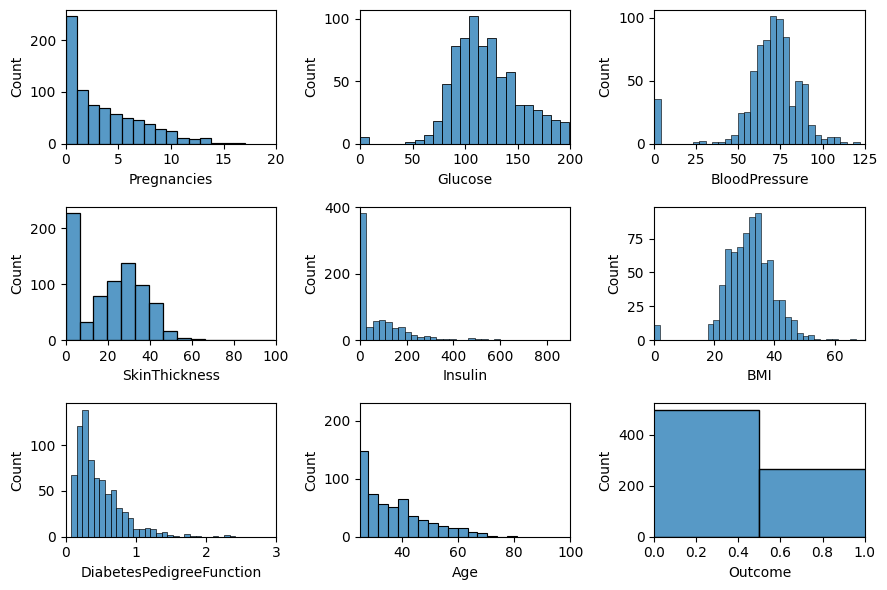

In [6]:
fig, axis = plt.subplots(3, 3, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set_xlim(0, 20)  
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set_xlim(0, 200)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlim = (0, 125))  
sns.histplot(ax = axis[1, 0], data = df, x = "SkinThickness").set_xlim(0, 100)
sns.histplot(ax = axis[1, 1], data = df, x = "Insulin").set(xlim = (0, 900))
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set_xlim(0, 70)
sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction").set_xlim(0, 3)
sns.histplot(ax = axis[2, 1], data = df, x = "Age").set_xlim(25, 100)
sns.histplot(ax = axis[2, 2], data = df, x = "Outcome", bins=[0,1,2], discrete=True).set_xlim(0, 1)

plt.tight_layout()

# Show the plot
plt.show()

In [7]:

print(df["Glucose"].value_counts().get(0,0))
print(df["BMI"].value_counts().get(0,0))
print(df["BloodPressure"].value_counts().get(0,0))
print(df["SkinThickness"].value_counts().get(0,0))
print(df["Insulin"].value_counts().get(0,0))

5
11
35
227
374


In [8]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

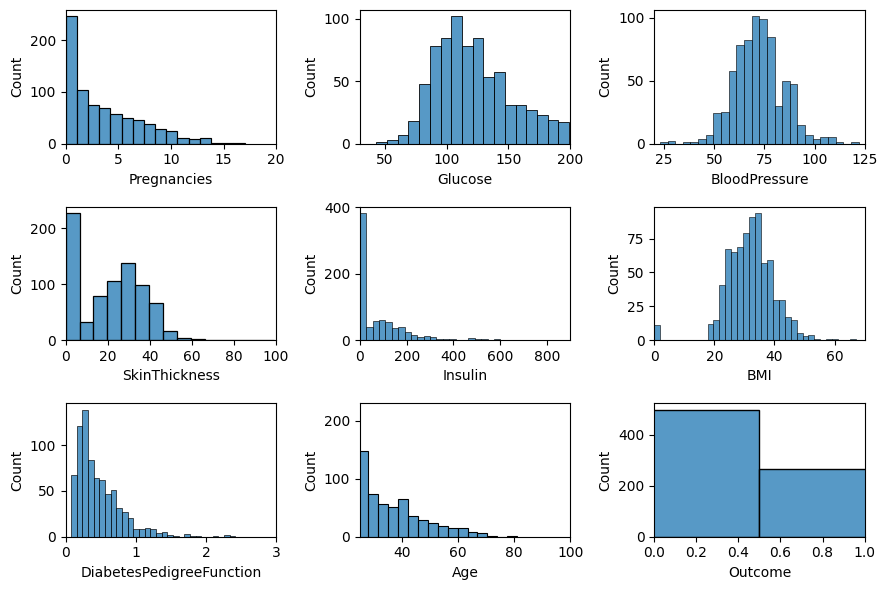

In [9]:
fig, axis = plt.subplots(3, 3, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set_xlim(0, 20)  
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set_xlim(30, 200)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlim = (20, 125))  
sns.histplot(ax = axis[1, 0], data = df, x = "SkinThickness").set_xlim(0, 100)
sns.histplot(ax = axis[1, 1], data = df, x = "Insulin").set(xlim = (0, 900))
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set_xlim(0, 70)
sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction").set_xlim(0, 3)
sns.histplot(ax = axis[2, 1], data = df, x = "Age").set_xlim(25, 100)
sns.histplot(ax = axis[2, 2], data = df, x = "Outcome", bins=[0,1,2], discrete=True).set_xlim(0, 1)

plt.tight_layout()

# Show the plot
plt.show()

In [10]:
#for this 'branch' we are going to use the K-Nearest Neighbors method

from sklearn.impute import KNNImputer


cols_to_update = ["Glucose", "BMI", "BloodPressure", "SkinThickness", "Insulin"]
df[cols_to_update] = df[cols_to_update].replace(0,np.nan)


imputer = KNNImputer(n_neighbors=5)

df[cols_to_update] = imputer.fit_transform(df[cols_to_update])

In [11]:

print(df["Glucose"].value_counts().get(0,0))
print(df["BMI"].value_counts().get(0,0))
print(df["BloodPressure"].value_counts().get(0,0))
print(df["SkinThickness"].value_counts().get(0,0))
print(df["Insulin"].value_counts().get(0,0))

0
0
0
0
0


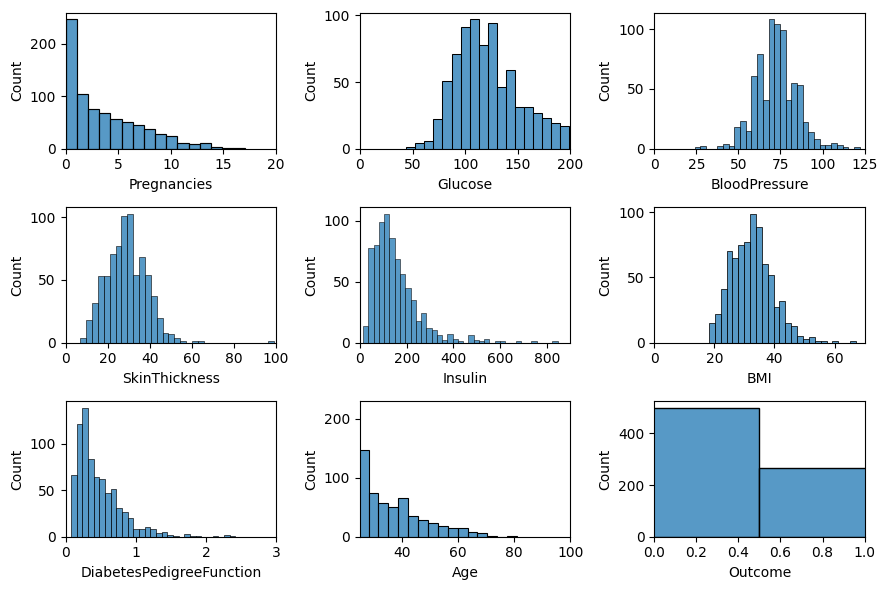

In [12]:
fig, axis = plt.subplots(3, 3, figsize=(9, 6))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "Pregnancies").set_xlim(0, 20)  
sns.histplot(ax = axis[0, 1], data = df, x = "Glucose").set_xlim(0, 200)
sns.histplot(ax = axis[0, 2], data = df, x = "BloodPressure").set(xlim = (0, 125))  
sns.histplot(ax = axis[1, 0], data = df, x = "SkinThickness").set_xlim(0, 100)
sns.histplot(ax = axis[1, 1], data = df, x = "Insulin").set(xlim = (0, 900))
sns.histplot(ax = axis[1, 2], data = df, x = "BMI").set_xlim(0, 70)
sns.histplot(ax = axis[2, 0], data = df, x = "DiabetesPedigreeFunction").set_xlim(0, 3)
sns.histplot(ax = axis[2, 1], data = df, x = "Age").set_xlim(25, 100)
sns.histplot(ax = axis[2, 2], data = df, x = "Outcome", bins=[0,1,2], discrete=True).set_xlim(0, 1)

plt.tight_layout()

# Show the plot
plt.show()

In [13]:
#Want to normalize this real quick before heatmap, just to see

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled)



     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.234375  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.070913  0.171779   
2       0.470588  0.896774       0.408163       0.243478  0.443750  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.239663  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.147826  0.200481  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.081490  0.249489   

     DiabetesPedigreeFunction       Age

<Axes: >

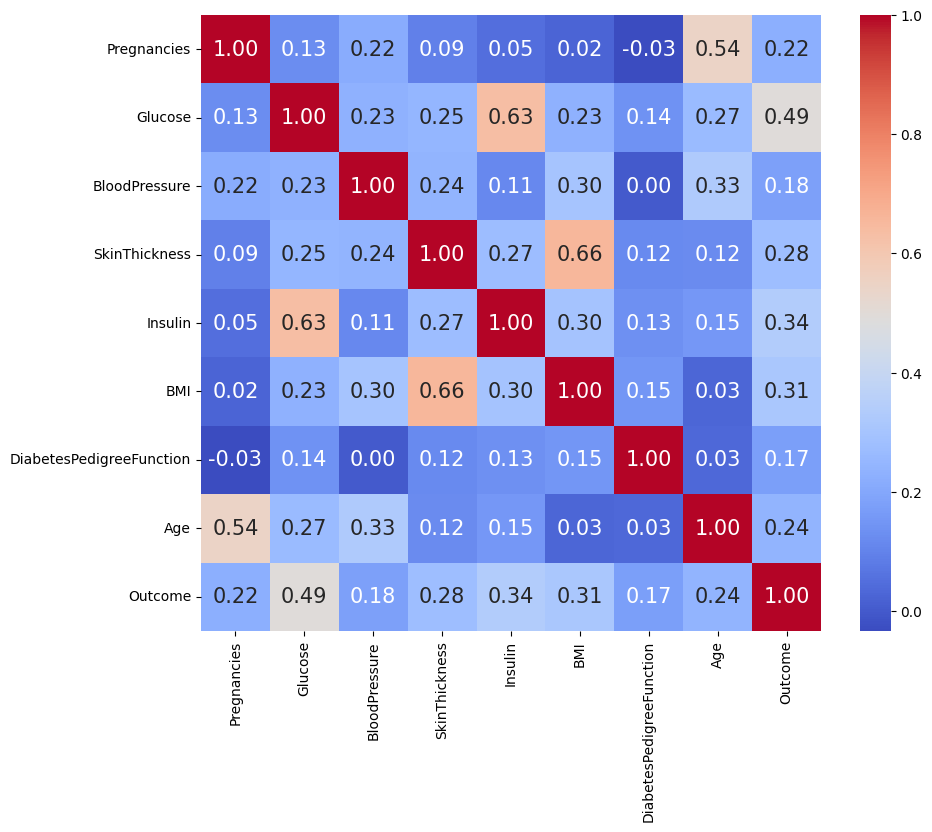

In [14]:
fig, axis = plt.subplots(figsize=(10, 8))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 15})


<Axes: >

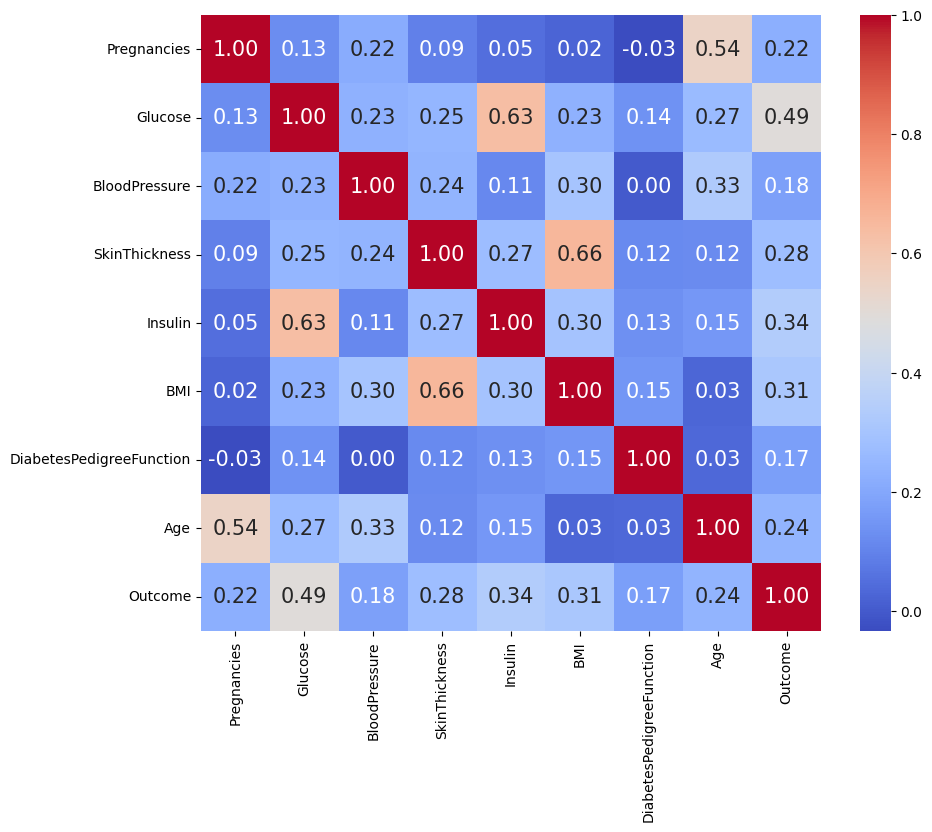

In [15]:
fig, axis = plt.subplots(figsize=(10, 8))

sns.heatmap(df_scaled[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 15})


In [16]:
df = df.drop(columns=['Pregnancies'])

In [17]:
#Let's do the decision tree stuff now

from sklearn.model_selection import train_test_split

X, y = df.drop(columns=['Outcome']), df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [18]:
print(X_train.head())
print(y_train.head())

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60      84.0           70.0           27.6     95.6  36.2   
618    112.0           82.0           24.0    110.6  28.2   
346    139.0           46.0           19.0     83.0  28.7   
294    161.0           50.0           26.8    376.2  21.9   
231    134.0           80.0           37.0    370.0  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64


<Axes: >

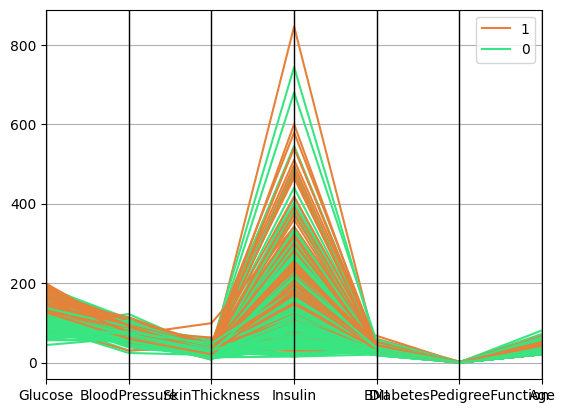

In [19]:


# Plot Parallel Coordinates
pd.plotting.parallel_coordinates(df, "Outcome", color=("#E58139",  "#39E581"))

<Axes: >

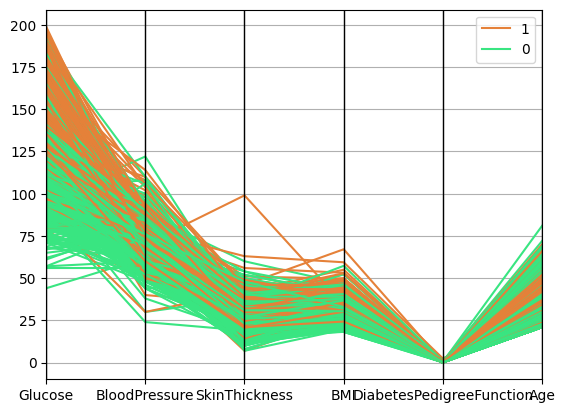

In [20]:
df_without_insulin = df.drop(columns='Insulin')

# Plot Parallel Coordinates
pd.plotting.parallel_coordinates(df_without_insulin, "Outcome", color=("#E58139",  "#39E581"))

<Axes: >

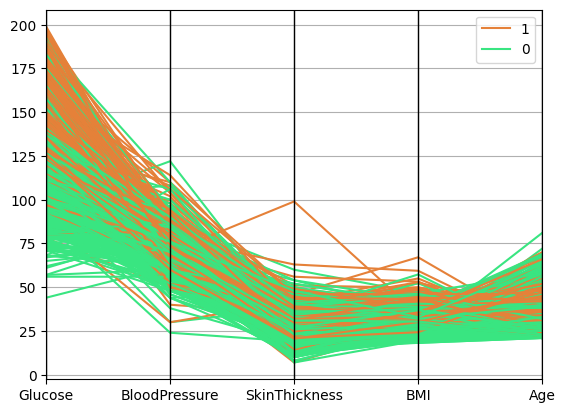

In [21]:
df_without_insulin_or_pedigree = df_without_insulin.drop(columns='DiabetesPedigreeFunction')


# Plot Parallel Coordinates
pd.plotting.parallel_coordinates(df_without_insulin_or_pedigree, "Outcome", color=("#E58139",  "#39E581"))


<Axes: >

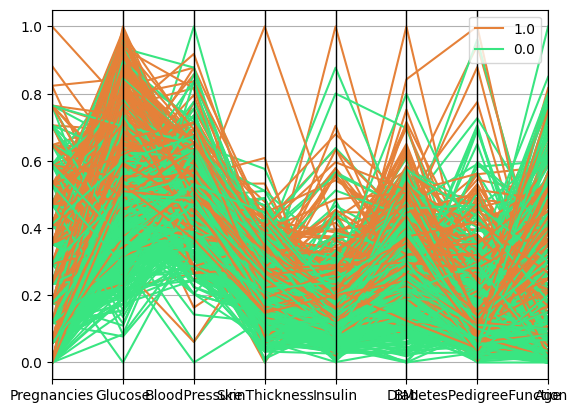

In [22]:

# Plot Parallel Coordinates
pd.plotting.parallel_coordinates(df_scaled, "Outcome", color=("#E58139",  "#39E581"))

In [23]:
#let's ignore the scaled df for now

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

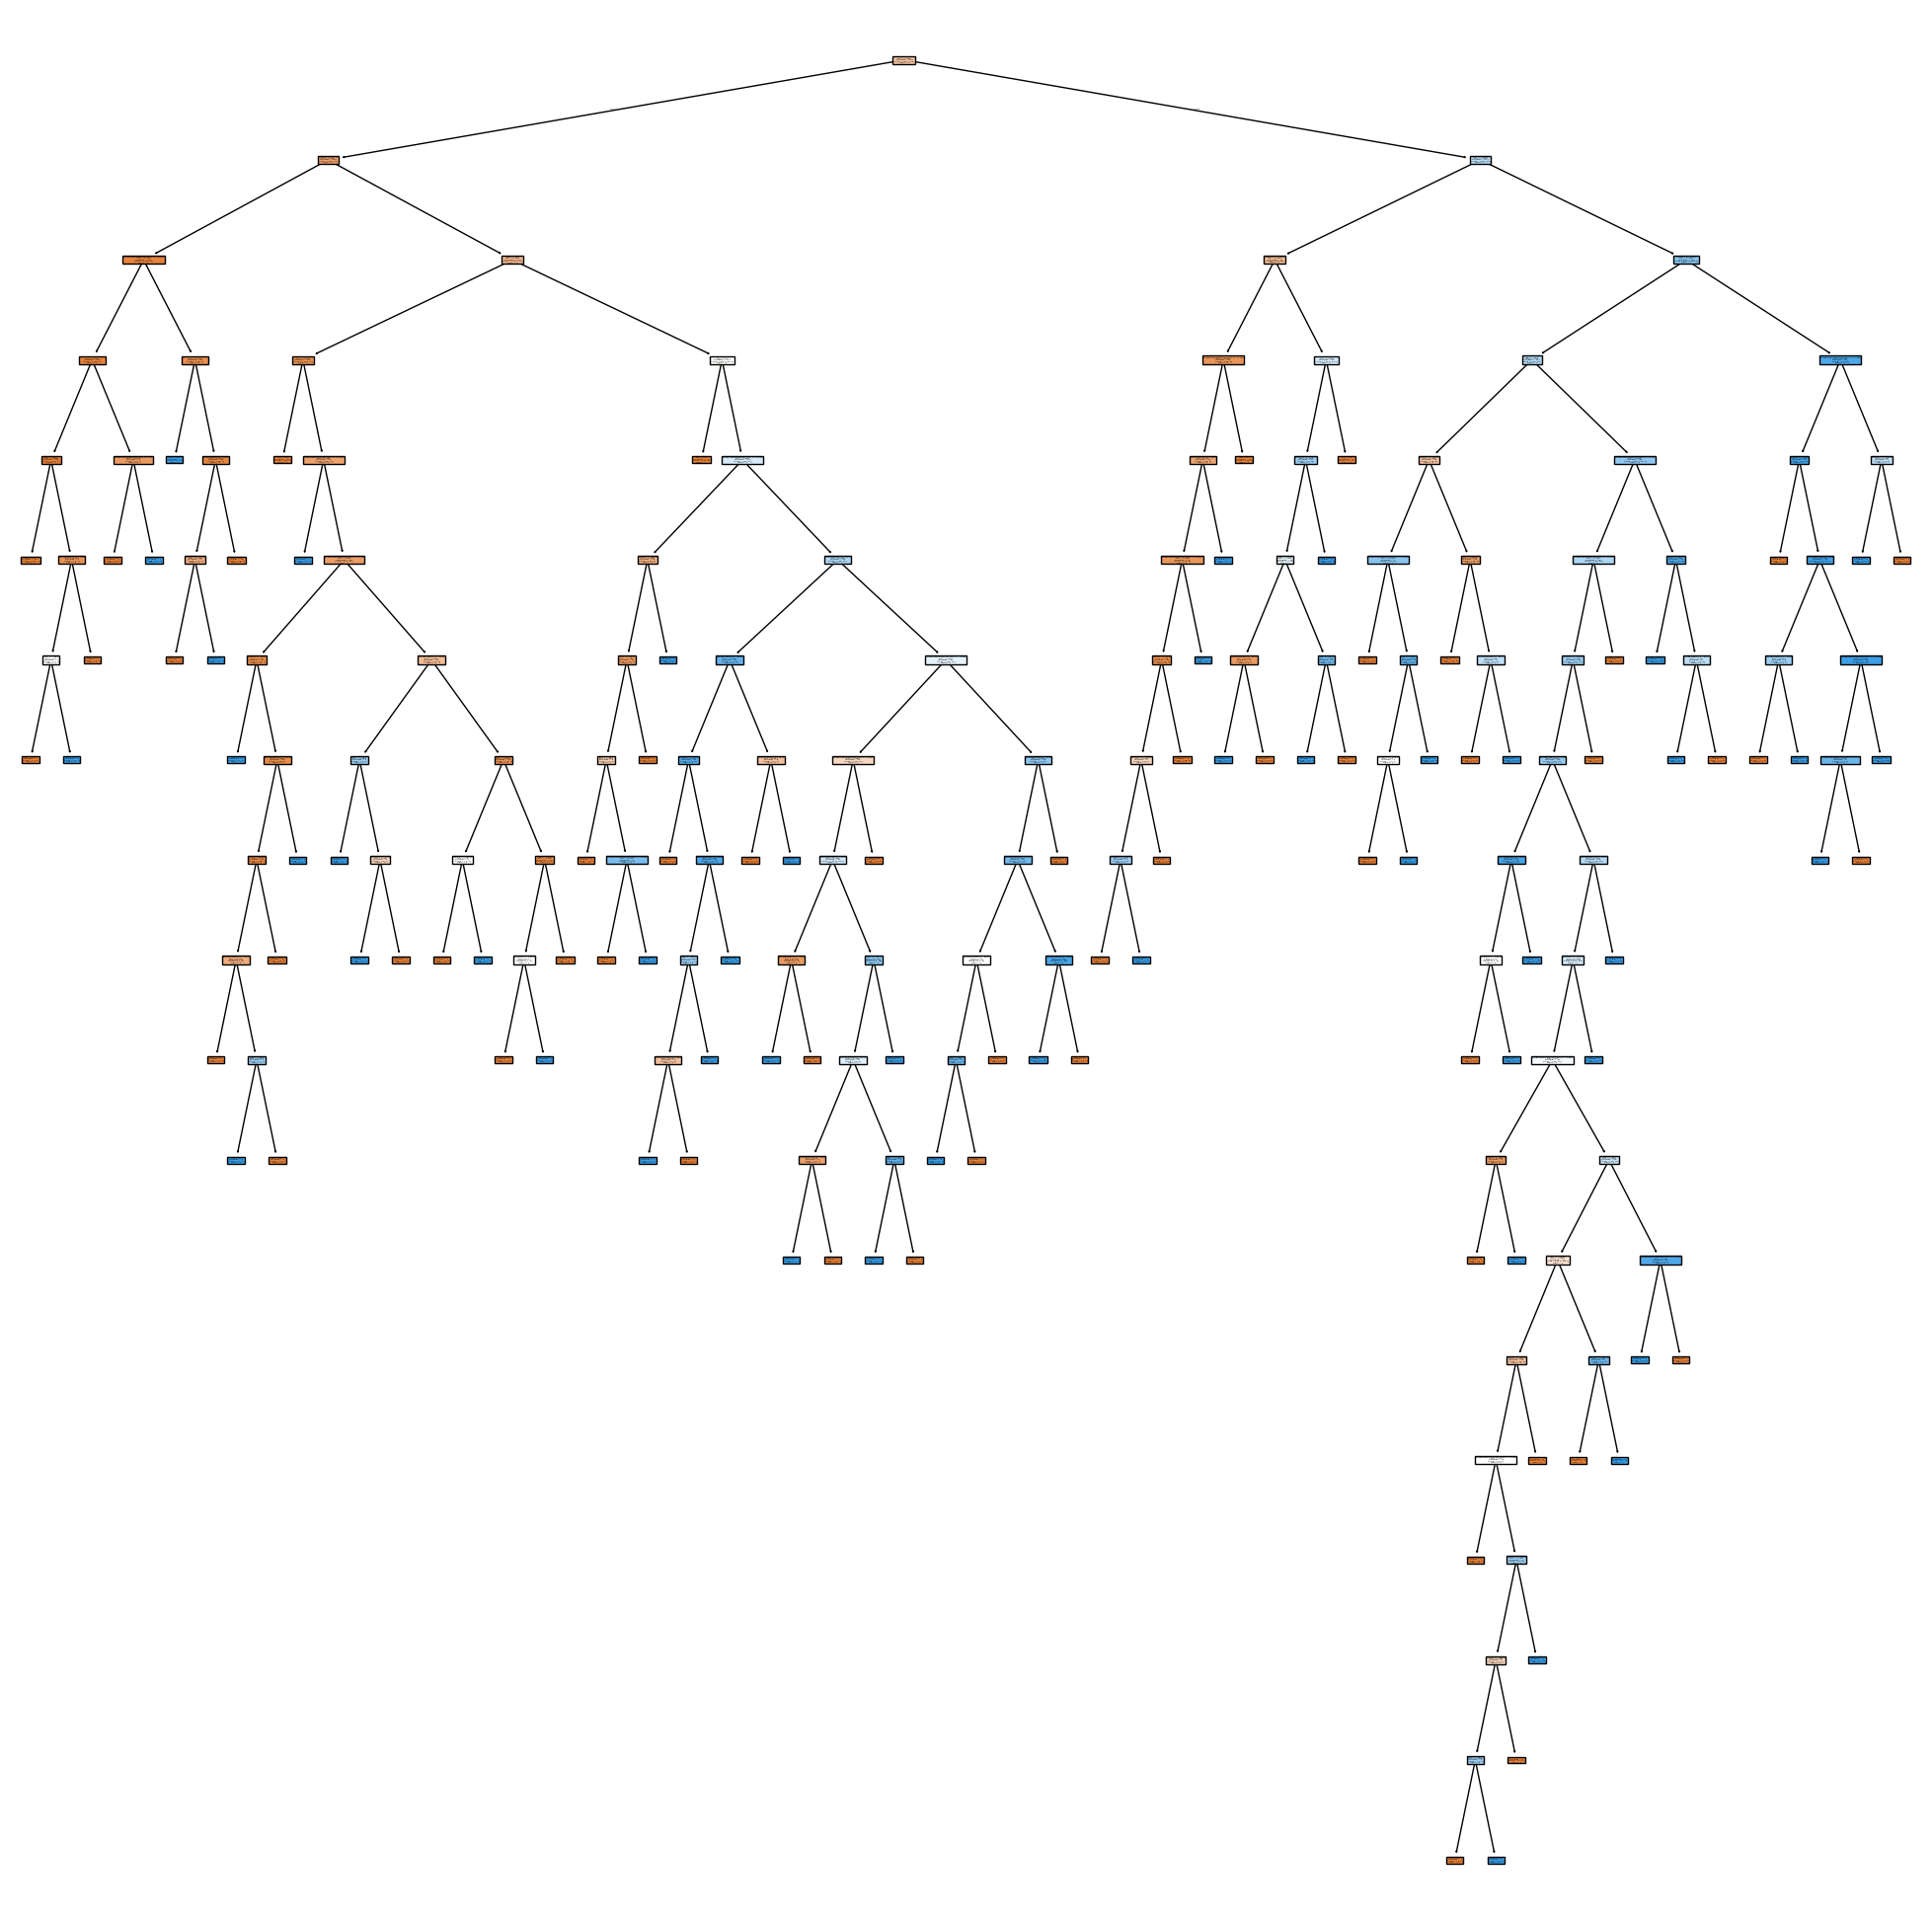

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,25))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [25]:
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)





0.7337662337662337

In [27]:
#Some model Optimization here
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion" : ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split" : [2, 5, 10], 
    "min_samples_leaf" : [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")




Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [29]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=4, min_samples_split=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10)

In [30]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7532467532467533

In [32]:
from pickle import dump

dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))

#### Changing to work for Random Forests here

In [33]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,84.0,70.0,27.6,95.6,36.2,0.304,21
618,112.0,82.0,24.0,110.6,28.2,1.282,50
346,139.0,46.0,19.0,83.0,28.7,0.654,22
294,161.0,50.0,26.8,376.2,21.9,0.254,65
231,134.0,80.0,37.0,370.0,46.2,0.238,46


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

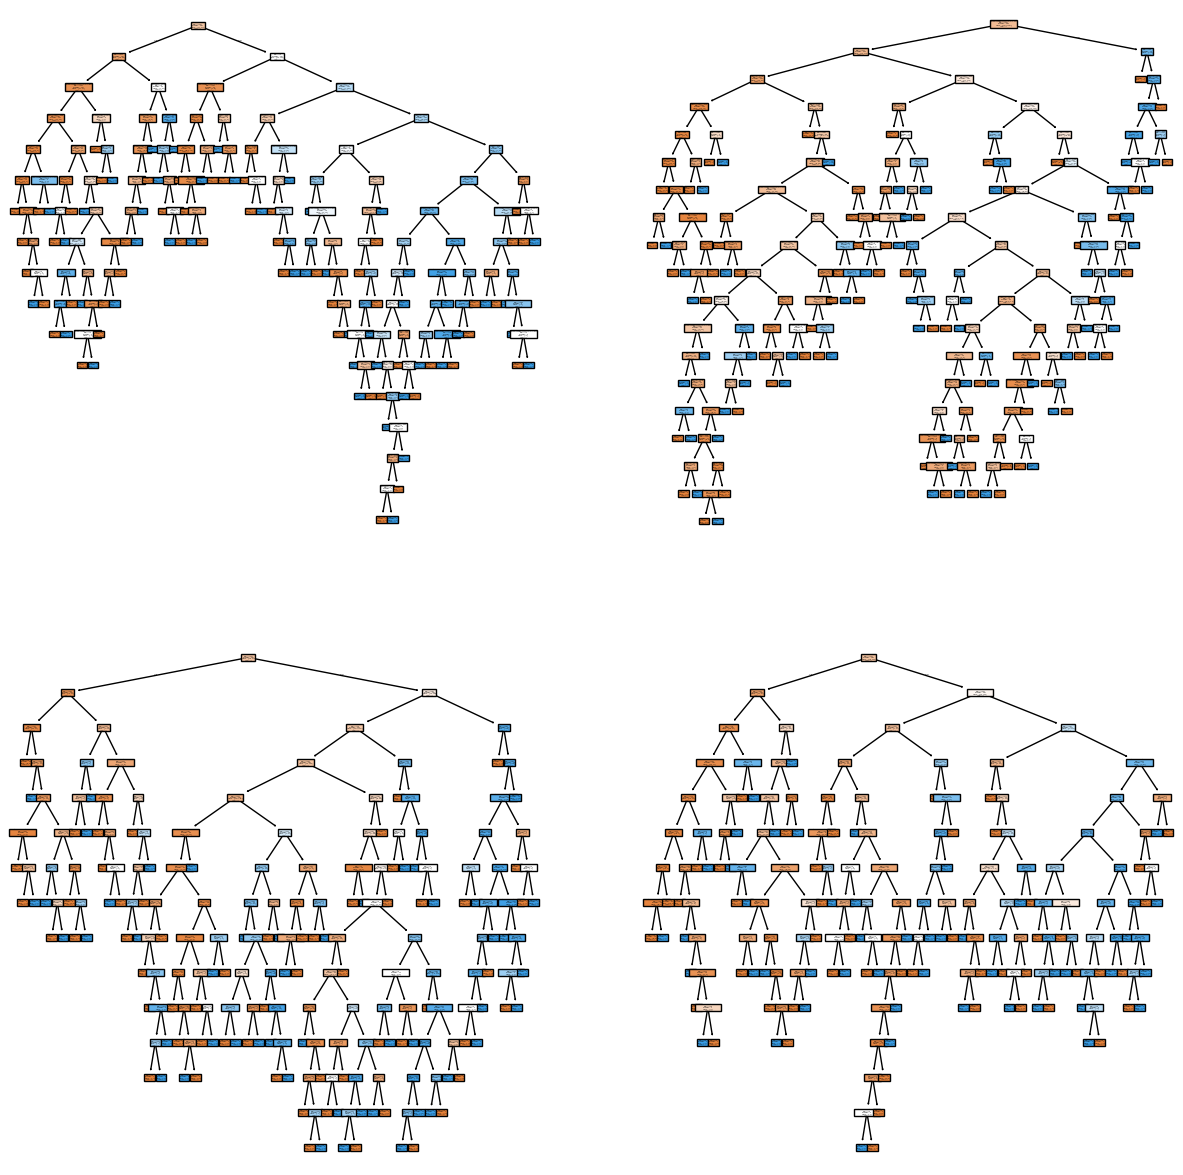

In [35]:
fig, axis = plt.subplots(2,2, figsize = (15,15))

tree.plot_tree(model.estimators_[0], ax = axis[0,0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0,1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1,0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1,1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [37]:
accuracy_score(y_test, y_pred)

0.7272727272727273

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test)
y_pred


array([0.59, 0.15, 0.11, 0.07, 0.47, 0.69, 0.03, 0.86, 0.63, 0.67, 0.38,
       0.82, 0.45, 0.11, 0.07, 0.52, 0.1 , 0.01, 0.73, 0.44, 0.43, 0.02,
       0.35, 0.02, 0.56, 0.99, 0.05, 0.  , 0.23, 0.09, 0.72, 0.63, 0.89,
       0.94, 0.7 , 0.69, 0.91, 0.55, 0.28, 0.52, 0.02, 0.45, 0.76, 0.54,
       0.  , 0.78, 0.44, 0.07, 0.02, 0.97, 0.  , 0.75, 0.79, 0.25, 0.08,
       0.04, 0.53, 0.03, 0.34, 0.74, 0.61, 0.15, 0.3 , 0.44, 0.11, 0.65,
       0.  , 0.69, 0.01, 0.7 , 0.79, 0.  , 0.06, 0.  , 0.11, 0.34, 0.06,
       0.17, 0.29, 0.14, 0.78, 0.03, 0.03, 0.7 , 0.24, 0.92, 0.68, 0.44,
       0.07, 0.02, 0.04, 0.19, 0.02, 0.51, 0.5 , 0.59, 0.66, 0.06, 0.8 ,
       0.04, 0.69, 0.02, 0.77, 0.7 , 0.86, 0.15, 0.36, 0.99, 0.22, 0.78,
       0.  , 0.78, 0.22, 0.85, 0.44, 0.53, 0.71, 0.39, 0.03, 0.28, 0.01,
       0.17, 0.31, 0.1 , 0.24, 0.61, 0.32, 0.72, 0.84, 0.73, 0.75, 0.78,
       0.06, 0.24, 0.99, 0.35, 0.13, 0.8 , 0.78, 0.02, 0.02, 0.02, 0.27,
       0.59, 0.12, 0.2 , 0.08, 0.05, 0.43, 0.74, 0.

In [40]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")


Mean squared error: 0.17311233766233766


#### Boosting Stuff here

In [41]:
#Going to start with the boosting stuff here

from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
import xgboost
print(xgboost.__version__)

2.1.4


In [43]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [44]:
accuracy_score(y_test, y_pred)

0.7012987012987013

In [45]:
#let's make a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[72, 27],
       [19, 36]])

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([ 0.70937777,  0.2887824 , -0.15582958,  0.05549042,  0.6769558 ,
        1.1652386 , -0.00186298,  0.8685031 ,  0.6175025 ,  0.6909575 ,
        0.37768734,  0.8211548 ,  0.16986081,  0.11097991,  0.01249014,
        0.62432903,  0.13416584,  0.00672624,  0.79176515,  0.7020667 ,
        0.38389528,  0.04696615,  0.16049884, -0.08613522,  0.4873964 ,
        1.0740317 ,  0.3225429 ,  0.06864998,  0.01724073,  0.08695665,
        0.9362297 ,  0.62619245,  0.8167857 ,  0.8521614 ,  0.79394466,
        0.5334581 ,  1.103976  ,  0.58747375,  0.4621308 ,  0.91498643,
        0.02523175,  0.17393544,  1.2330925 ,  0.3171462 , -0.01894938,
        0.9374692 ,  0.8228503 ,  0.1354193 ,  0.02477173,  0.975895  ,
       -0.00260273,  0.8915014 ,  0.68699044,  0.32773116, -0.06893229,
        0.01412077,  0.8377712 ,  0.12016787,  0.13630211,  0.8648743 ,
        0.58737415, -0.00170194,  0.01210965,  0.31169295, -0.00927951,
        0.85493696,  0.01093756,  0.8798428 ,  0.04884592,  0.94

In [51]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")



Mean squared error: 0.21879562735557556


In [52]:
model.save_model("../models/xgboost_classifier_42.model")